intro

In [68]:
# Importo los módulos y las bibliotecas que usaré en este bloque de código y en los siguientes
import pandas as pd  
import sqlalchemy  
import getpass  
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
import squarify


# Función para crear una conexión con la base de datos
def create_database_connection(user, password, host, database_name):

    try:
        # Creo un motor de conexión con SQLAlchemy utilizando pymysql como driver
        engine = sqlalchemy.create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database_name}")

        # Establezco una conexión con la base de datos
        connection = engine.connect()

        print("\nConexión a la base de datos establecida con éxito.\n")
        return engine, connection 
    except Exception as e:
        # Capturo y mostro errores en caso de que falle la conexión
        print("\nError en la conexión a la base de datos:\n", e)

        return None, None  # Si falla, retorno None para ambos.

# Función para obtener los nombres de las tablas disponibles en la base de datos
def get_table_names(engine):

    # Crear un inspector para examinar la base de datos
    inspector = sqlalchemy.inspect(engine)

    # Obtener una lista de nombres de tablas
    table_names = inspector.get_table_names()

    if table_names:
        # Si se encuentran tablas, mostrarlas en pantalla
        print("Tablas encontradas en la base de datos:", table_names)

    else:
        # Si no hay tablas, informo al usuario y termino el programa
        print("Ninguna tabla encontrada en la base de datos.\n\nSalida del programa")

    return table_names

# Función para cargar datos de las tablas en DataFrames de pandas
def load_tables_into_dataframes(connection, table_names):

    # Itero sobre cada tabla en la lista de nombres
    for table_name in table_names:

        # Creo una consulta SQL para seleccionar todos los datos de la tabla
        query = f"SELECT * FROM {table_name}"

        # Cargo los datos de la tabla en un DataFrame global con un nombre basado en el nombre de la tabla
        globals()[f"df_{table_name}"] = pd.read_sql(query, connection)

        print(f"\nDatos cargados para la tabla: {table_name}")

# Función para mostrar los datos y la estructura de los DataFrames
def display_dataframes(table_names):

    print("\nContenido de las tablas:")
    # Itero sobre cada nombre de tabla
    for table_name in table_names:

        # Construyo el nombre del DataFrame asociado a la tabla
        df_name = f"df_{table_name}"

        # Obtengo el DataFrame global usando su nombre
        df = globals()[df_name]

        # Muestro información sobre la tabla y ejemplos de datos (primeras y últimas filas)
        print(f"\nTabla: {table_name}")
        print(df.info(), "\n")  
        print(df.head(3), "\n")  
        print(df.tail(3), "\n") 

# Pido al usuario las credenciales para conectarse a la base de datos
user = input("Introduce el nombre de usuario para la base de datos (ej: root): ")
password = getpass.getpass("Introduce la contraseña para la base de datos (ej: ****): ")
host = input("Introduce el host de la base de datos (ej: localhost): ")
database_name = input("Introduce el nombre de la base de datos (ej: sprint_4_v2): ")

# Creo la conexión con la base de datos y cargar los datos
engine, connection = create_database_connection(user, password, host, database_name)
# Si la conexión fue exitosa obtengo los nombres de las tablas
if connection: 
    table_names = get_table_names(engine)  
    
    # Si se encontraron tablas cargolos datos en DataFrames y los muestro
    if table_names:  
        load_tables_into_dataframes(connection, table_names) 
        display_dataframes(table_names)  



Conexión a la base de datos establecida con éxito.

Tablas encontradas en la base de datos: ['companies', 'credit_cards', 'products', 'transactions', 'users']

Datos cargados para la tabla: companies

Datos cargados para la tabla: credit_cards

Datos cargados para la tabla: products

Datos cargados para la tabla: transactions

Datos cargados para la tabla: users

Contenido de las tablas:

Tabla: companies
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_id    100 non-null    object
 1   company_name  100 non-null    object
 2   phone         100 non-null    object
 3   email         100 non-null    object
 4   country       100 non-null    object
 5   website       100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB
None 

  company_id               company_name           phone  \
0     b-2222  Ac Fermentum Incorporated  06 8

1.1 Visualización de una variable numérica


<Axes: xlabel='edad', ylabel='count'>

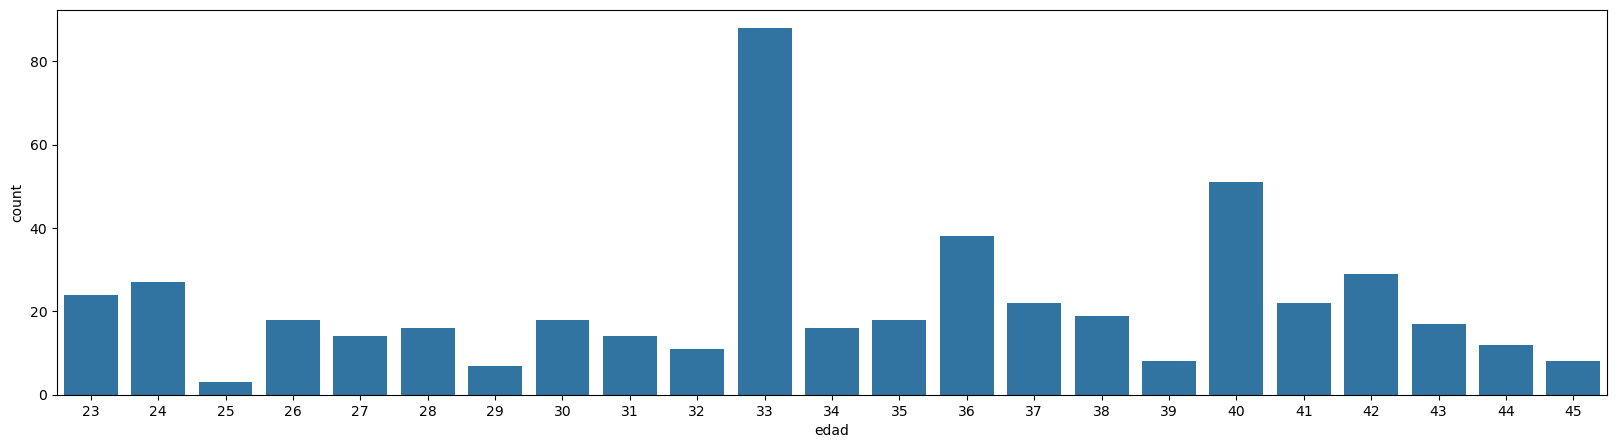

In [99]:
# Convierto la columna 'birth_date' en el DataFrame 'df_users' al formato de fecha, especificando el formato original de las fechas
df_users['birth_date'] = pd.to_datetime(df_users['birth_date'], format='%b %d, %Y')

# Calculo la edad en años para cada usuario basándose en la diferencia entre la fecha actual y su fecha de nacimiento
df_users['edad'] = df_users['birth_date'].apply(lambda x: (datetime.now() - x).days // 365)

# Filtro las transacciones aprobadas (donde 'declined' es igual a 0) y las almanezco en un nuevo DataFrame
df_transactions_x_1_1 = df_transactions[df_transactions['declined'] == 0]

# Combino los DataFrames 'df_users' y 'df_transactions_x_1_2' usando 'id' de 'df_users' y 'user_id' de 'df_transactions_x_1_1' como claves comunes
df_user_tx_1 = pd.merge(df_users, df_transactions_x_1_1, left_on="id", right_on="user_id")

# Creo una nueva figura para el gráfico con un tamaño de 20x5 pulgadas
plt.figure(figsize=(20, 5))

# Creo un gráfico de barras utilizando 'sns.countplot', mostrando la cantidad de usuarios para cada edad
sns.countplot(data=df_user_tx_1, x='edad')


1.2 Visualización de dos variables numéricas

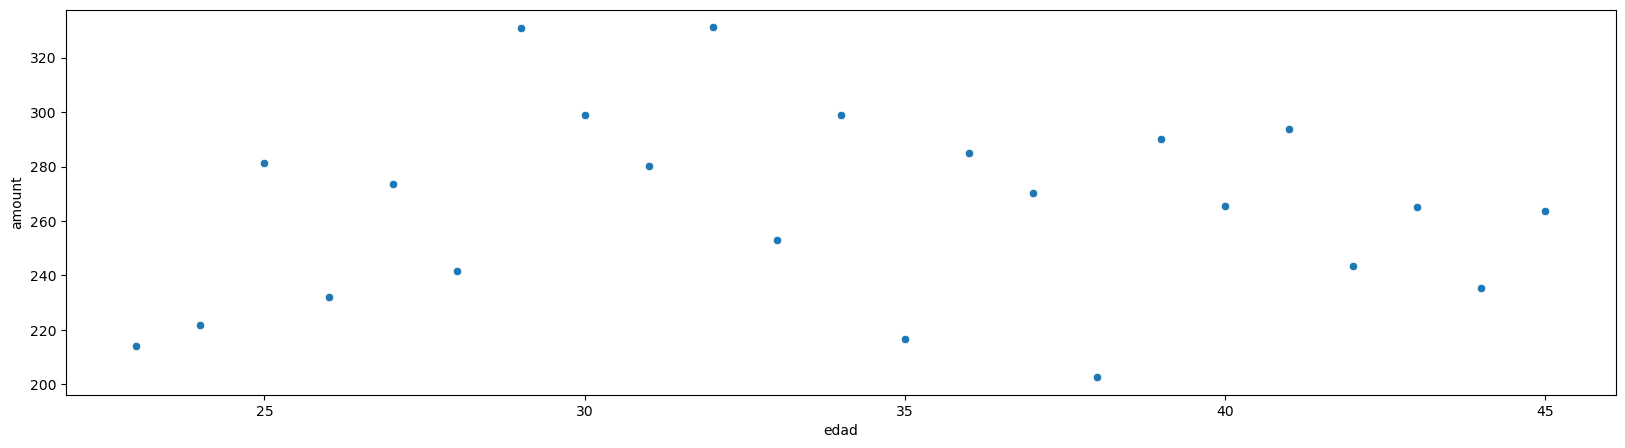

In [101]:
# Convierto la columna 'amount' en el DataFrame 'df_transactions' al tipo de dato float
df_transactions['amount'] = df_transactions['amount'].astype(float)

# Filtro las transacciones aprobadas (donde 'declined' es igual a 0) y las almanezco en un nuevo DataFrame
df_transactions_x_1_2 = df_transactions[df_transactions['declined'] == 0]

# Combino los DataFrames 'df_users' y 'df_transactions_x_1_2' usando 'id' de 'df_users' y 'user_id' de 'df_transactions_x_1_2' como claves comunes
df_user_tx_2 = pd.merge(df_users, df_transactions_x_1_2, left_on="id", right_on="user_id")

# Agrupo los datos por edad ('edad') y calculo la media de los montos ('amount') por grupo
compra_by_age = df_user_tx_2.groupby('edad')["amount"].mean().reset_index()

# Crear una nueva figura para el gráfico con un tamaño de 20x5 pulgadas
plt.figure(figsize=(20, 5))

# Crear un diagrama de dispersión (scatter plot) que muestre la relación entre la edad ('edad') y el monto promedio de compra ('amount')
sns.scatterplot(data=compra_by_age, x="edad", y="amount")

# Muestra el gráfico
plt.show()



1.3 Visualización de una variable categorica

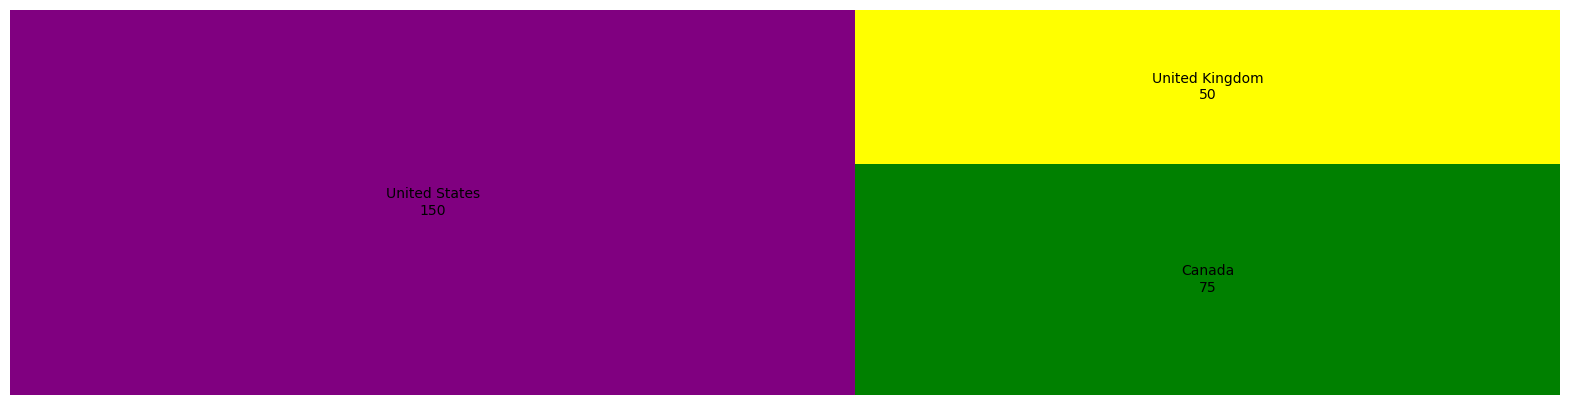

In [95]:
# Creo una nueva figura para el gráfico con un tamaño de 20x5 pulgadas
plt.figure(figsize=(20, 5))

# Defino los colores para cada país
country_colors = {
    'Canada': 'green',
    'United States': 'purple',
    'United Kingdom': 'yellow'
}

# Creo un gráfico de treemap (diagrama de árbol) con el paquete 'squarify'
squarify.plot(

    # Defino los tamaños de los bloques del gráfico basados en el recuento de países en la columna 'country'
    sizes=df_users['country'].value_counts().values,
    
    # Creo las etiquetas para cada bloque con el nombre del país y su recuento
    label=[f"{country}\n{count}" for country, count in zip(
        df_users['country'].value_counts().index,  
        df_users['country'].value_counts().values 
    )],
    
    # Asigno los colores a los bloques según el país
    color=[country_colors.get(country, 'lightgrey') for country in df_users['country'].value_counts().index]
)

# Elimino los ejes del gráfico para una presentación más limpia
plt.axis("off")

# Muestro el gráfico en pantalla
plt.show()


1.4 Visualización de una variable categorica y una numérica

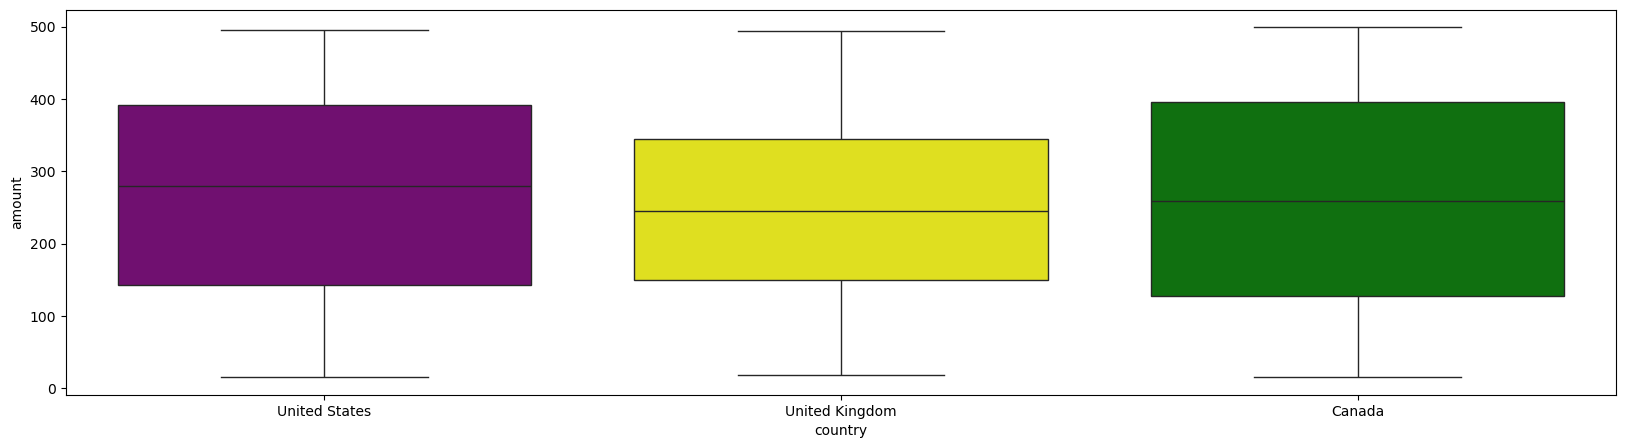

In [103]:
# Filtro las transacciones aprobadas (declined == 0)
df_transactions_x_1_4 = df_transactions[df_transactions['declined'] == 0]

# Fusiono la tabla filtrada df_transactions_x_1_4 con la tabla df_users
df_merged_x_1_4 = pd.merge(df_users, df_transactions_x_1_4, left_on="id", right_on="user_id")

# Defino los colores para cada país
country_colors = {
    'Canada': 'green',
    'United States': 'purple',
    'United Kingdom': 'yellow'
}

# Creo una figura para el gráfico con un tamaño específico
plt.figure(figsize=(20, 5))

# Creo un gráfico de caja (boxplot) usando Seaborn con colores personalizados
sns.boxplot(
    x='country', 
    y='amount', 
    data=df_merged_x_1_4, 
    hue='country',  # Asignamos 'country' a 'hue'
    palette=country_colors,  # Usamos la paleta personalizada
    legend=False  # Desactivamos la leyenda para evitar el warning
)

# Muestro el gráfico
plt.show()


1.5 Visualización de dos variables categoricas

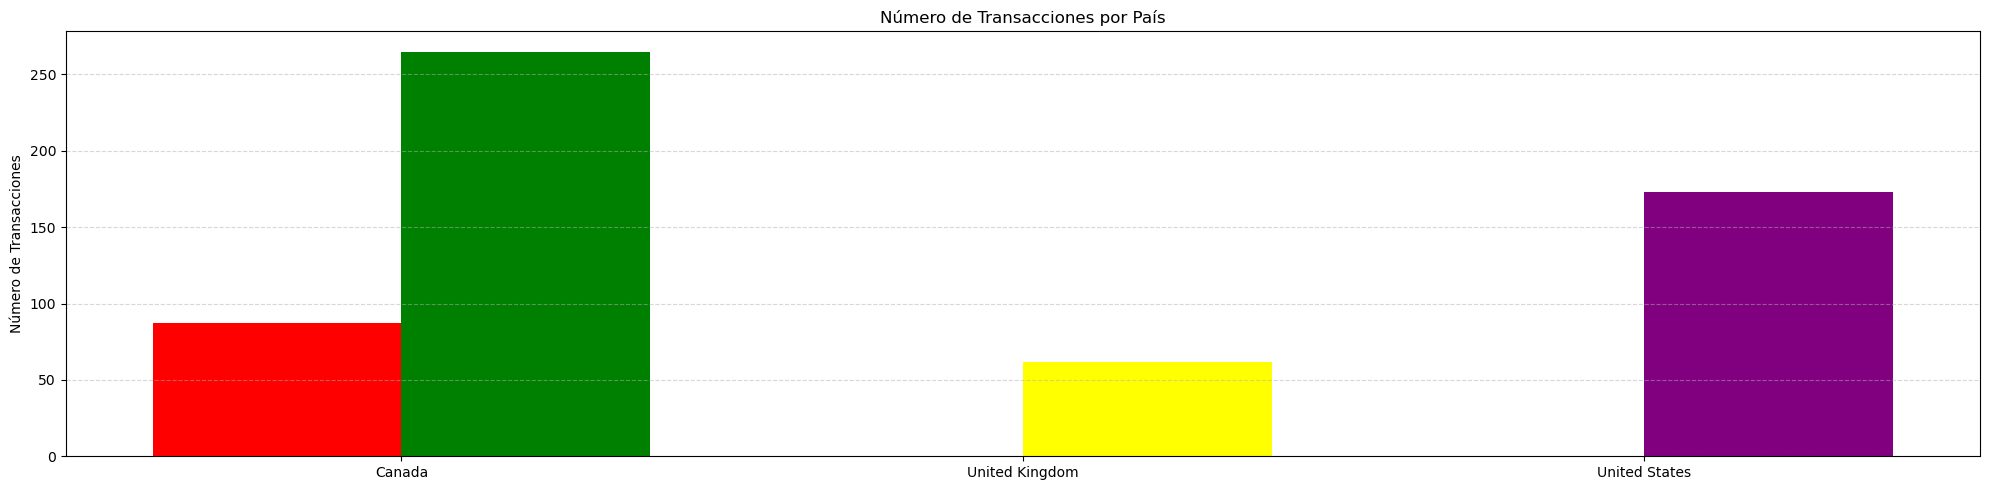

In [ ]:
# Hago la union de la tabla de transacciones (df_transactions) con la tabla de usuarios (df_users) usando la columna 'user_id'
declined_by_country = (
    df_transactions.merge(df_users.rename(columns={'id': 'user_id'}), on='user_id')

    # Agrupo los datos por país ('country') para calcular el número de transacciones rechazadas y aceptadas
    .groupby('country', as_index=False)

    .agg(
        # Calculo el número de transacciones rechazadas contando cuántas tienen 'declined' igual a 1 y cuántas tienen 'declined' igual a 0
        num_declined=('declined', lambda x: (x == 1).sum()),  
        num_accepted=('declined', lambda x: (x == 0).sum())  

    )
)

# Creo el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(20, 5))  

# Defino las posiciones en el eje X para las barras correspondientes a cada país y el ancho de cada barra
x = np.arange(len(declined_by_country['country']))  
bar_width = 0.4 

# Defino los colores para cada país
country_colors = {
    'Canada': 'green',
    'United States': 'purple',
    'United Kingdom': 'yellow'
}

# Creo las barras para las transacciones rechazadas (color rojo)
ax.bar(
    
    # Modifico la posición para alinearlas a la izquierda
    x - bar_width / 2,  

    # Altura de las barras basada en el número de transacciones rechazadas
    declined_by_country['num_declined'],  

    # Ancho de las barras
    width=bar_width,  

    # Color rojo para las barras
    color='red'  
)

# Creo las barras para las transacciones aceptadas (con colores personalizados)
for i, country in enumerate(declined_by_country['country']):

    # Asigno el color de acuerdo al país
    color = country_colors.get(country, 'blue')

    ax.bar(
        # Modifico la posición para alinearlas a la derecha
        x[i] + bar_width / 2,  

        # Altura de las barras basada en el número de transacciones aceptadas
        declined_by_country['num_accepted'].iloc[i], 

        # Ancho de las barras
        width=bar_width,  

        # Color correspondiente al país
        color=color  
    )

# Configuro las etiquetas, el título del gráfico
ax.set_xticks(x)  
ax.set_xticklabels(declined_by_country['country'])  
ax.set_ylabel('Número de Transacciones')  
ax.set_title('Número de Transacciones por País')  
plt.grid(axis='y', linestyle='--', alpha=0.5)  

# Muestro el gráfico
plt.tight_layout()  
plt.show()


1.6 Visualización de tres variables 

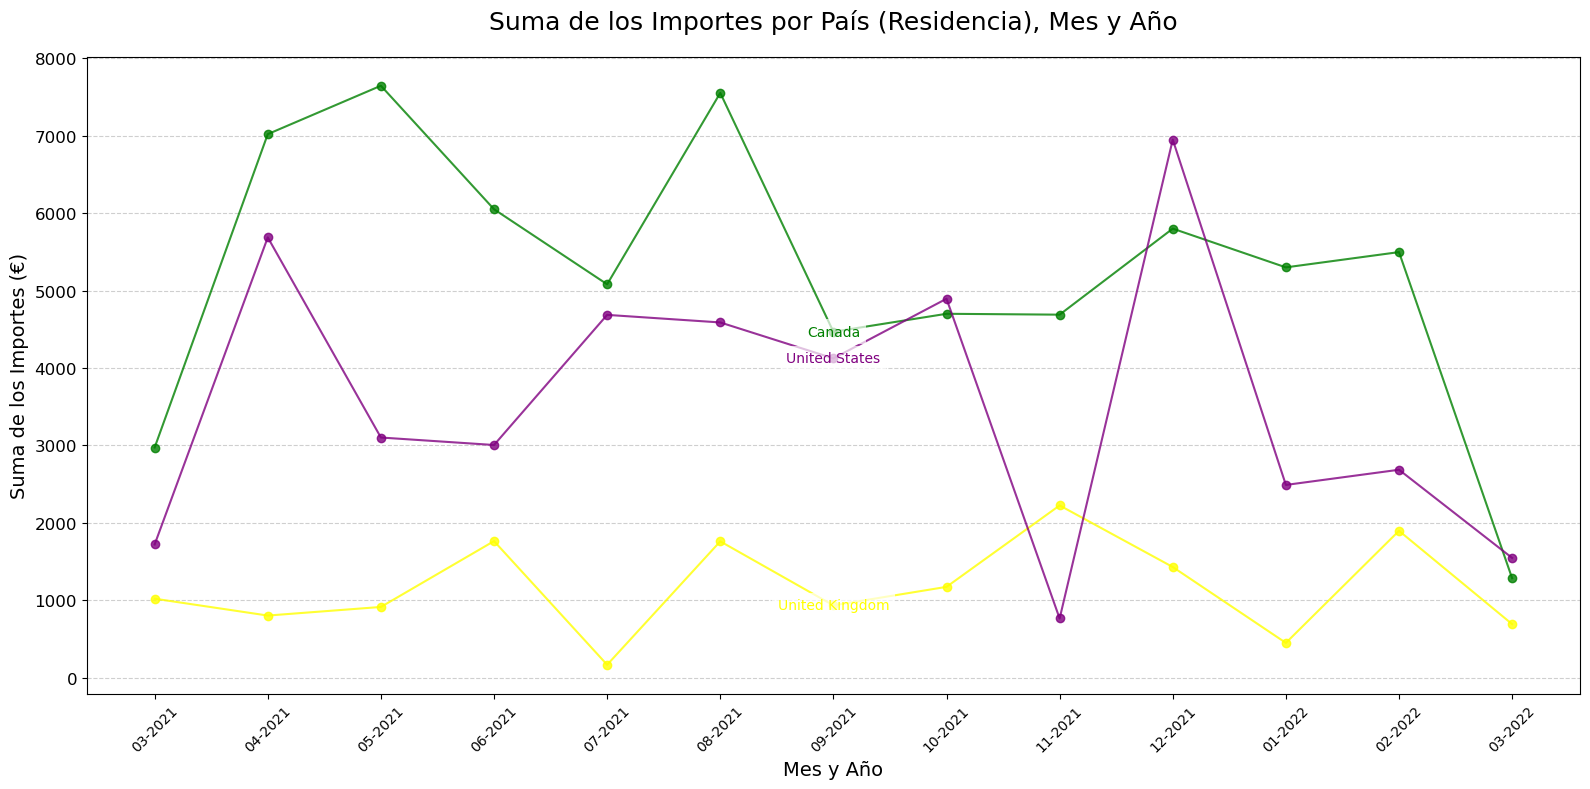

In [ ]:
# Convierto la columna 'timestamp' a tipo datetime y creo las columnas 'year' y 'month'
df_transactions['timestamp'] = pd.to_datetime(df_transactions['timestamp'])
df_transactions['year'] = df_transactions['timestamp'].dt.year
df_transactions['month'] = df_transactions['timestamp'].dt.month

# Filtro las transacciones aprobadas (declined == 0)
df_transactions_x_1_6 = df_transactions[df_transactions['declined'] == 0]

# Fusiono la tabla filtrada df_transactions_x_1_6 con la tabla df_users
df_merged_x_1_6 = pd.merge(df_users, df_transactions_x_1_6, left_on="id", right_on="user_id")

# Calculo la suma de los montos por país (residencia), año y mes
df_grouped = df_merged_x_1_6.groupby(['country', 'year', 'month'])['amount'].sum().reset_index()

# Creo una nueva columna combinada "year_month" con mes y año en el formato "mes-año"
df_grouped['year_month'] = df_grouped['month'].astype(str).str.zfill(2) + '-' + df_grouped['year'].astype(str)

# Defino los colores para cada país
country_colors = {
    'Canada': 'green',
    'United States': 'purple',
    'United Kingdom': 'yellow'
}

# Creo el gráfico de líneas
plt.figure(figsize=(16, 8))

# Itero sobre cada país en el DataFrame
for country in df_grouped['country'].unique():
    country_data = df_grouped[df_grouped['country'] == country]
    
    # Obtengo el color del país del diccionario, si no existe, usa el azul por defecto
    color = country_colors.get(country, 'blue')

    line, = plt.plot(
        # Mes y año en el eje X
        country_data['year_month'],  

        # Suma de los importes en el eje Y
        country_data['amount'],  

        # Añadir puntos sobre las líneas
        marker='o',  

        # Etiqueta del país
        label=country,  

        # Color de la linea
        color=color,  

        # Trasparencia
        alpha=0.8
    )
    
    # Determino una posición estratégica: inicio, fin o punto medio
    num_points = len(country_data)
    random_idx = num_points // 2  # Posición central

    x_pos = country_data['year_month'].iloc[random_idx]
    y_pos = country_data['amount'].iloc[random_idx]
    
    # Posiciono el nombre del país sobre la línea con el color correspondiente
    plt.text(
        # Posición en el eje X
        x_pos,  

        # Posición en el eje Y
        y_pos,  

        # Nombre del país
        country,  

        # Tamaño de la fuente
        fontsize=10,
        
        # Mismo color que la línea
        color=line.get_color(),

        # Alineación horizontal
        ha='right' if random_idx == 0 else ('left' if random_idx == -1 else 'center'),

        # Alineación vertical
        va='center',  

        # Fondo para mejorar la legibilidad
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  
    )

# Personalización del gráfico
plt.title('Suma de los Importes por País (Residencia), Mes y Año', fontsize=18, pad=20)
plt.xlabel('Mes y Año', fontsize=14)
plt.ylabel('Suma de los Importes (€)', fontsize=14)

# Modificar el formato de los ticks para mostrar primero el mes y luego el año
plt.xticks(
    df_grouped['year_month'].unique(),
    fontsize=10, 
    rotation=45
)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mejorar el layout
plt.tight_layout()
plt.show()


1.7 Pairplot

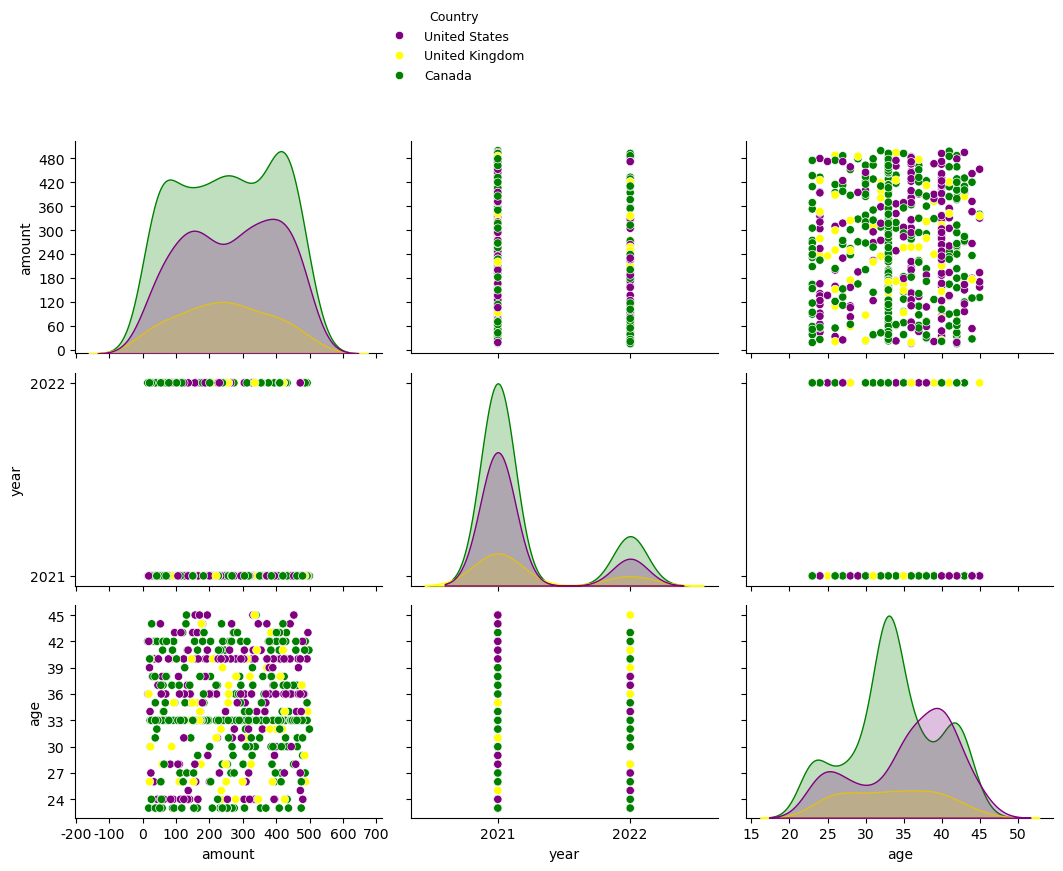

In [102]:
# Convierto la columna 'birth_date' en el DataFrame 'df_users' al formato de fecha
df_users['birth_date'] = pd.to_datetime(df_users['birth_date'], format='%b %d, %Y')

# Calculo la edad en años para cada usuario, basándome en la diferencia entre la fecha actual y la fecha de nacimiento
df_users['age'] = df_users['birth_date'].apply(lambda x: (datetime.now() - x).days // 365)

# Filtro las transacciones aprobadas (donde 'declined' es igual a 0)
df_transactions_approved = df_transactions[df_transactions['declined'] == 0]

# Uno los DataFrames 'df_transactions_approved' y 'df_users' usando 'user_id' en df_transactions e 'id' en df_users
df_merged = pd.merge(df_transactions_approved, df_users, left_on='user_id', right_on='id', how='left')

# Selecciono solo las columnas necesarias para el pairplot, incluyendo 'age'
df_pairplot = df_merged[['amount', 'year', 'country', 'age']]

# Defino los colores para cada país
country_colors = {
    'Canada': 'green',
    'United States': 'purple',
    'United Kingdom': 'yellow'
}

# Creo el pairplot sin la leyenda automática y aplico la paleta de colores
g = sns.pairplot(df_pairplot, hue='country', markers='o', palette=country_colors)

# Elimino la leyenda automática
g._legend.remove()

# Agrego la leyenda encima del gráfico
g.add_legend(title='Country')
g._legend.set_bbox_to_anchor((0.5, 1.1))  # Posiciono la leyenda arriba
g._legend.set_frame_on(False)

# Modifico el tamaño del título de la leyenda y de los textos
g._legend.get_title().set_fontsize(9)
for text in g._legend.get_texts():
    text.set_fontsize(9)

# Formateo el eje X para mostrar solo los años enteros
for ax in g.axes.flatten():
    
    # Modifico el eje X para mostrar solo el año (sin valores decimales)
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Muestra solo los años enteros
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))  # Formato para evitar valores decimales

    # Formateo el eje Y para mostrar solo números enteros
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Muestra solo números enteros en el eje Y
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y)}'))  # Formato para evitar valores decimales

plt.tight_layout()
plt.show()
